과제 내용 바탕 Task:

*   Optimization (starting point) - 기본 모델 구현 및 옵티마이저 설정
*   Add Dropout - 모델에 드롭아웃 레이어 추가
*   Add BatchNorm - 모델에 배치 정규화 레이어 추가
*   Apply Two Different Optimizers (ADAM and RMSProp) - 두 가지 다른 옵티마이저 적용하여 비교

먼저, 필요한 라이브러리를 import합니다.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

다음으로, 간단한 신경망 모델을 정의합니다. 여기서는 입력 크기가 10, 은닉층 크기가 20, 출력 크기가 5인 모델을 구성하였습니다.

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 20)  # 입력 크기 10, 출력 크기 20의 완전 연결 계층
        self.fc2 = nn.Linear(20, 5)  # 입력 크기 20, 출력 크기 5의 완전 연결 계층

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # fc1 계층을 통과한 후 ReLU 활성화 함수 적용
        x = self.fc2(x)
        return x

모델 인스턴스를 생성하고, 손실 함수와 옵티마이저를 정의합니다. 여기서는 크로스 엔트로피 손실 함수와 SGD 옵티마이저를 사용하였습니다.


In [3]:
model = Net()  # 모델 인스턴스 생성

criterion = nn.CrossEntropyLoss()  # 손실 함수로 크로스 엔트로피 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저, 학습률 0.01

Task 2에 해당하는 드롭아웃을 모델에 추가하였습니다. 드롭아웃 확률은 0.5로 설정하였습니다.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(p=0.5)  # 드롭아웃 레이어 추가, 확률 0.5
        self.fc2 = nn.Linear(20, 5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # 드롭아웃 적용
        x = self.fc2(x)
        return x

Task 3은 배치 정규화를 모델에 추가하는 것입니다. fc1 레이어 다음에 배치 정규화 레이어를 삽입하겠습니다.


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.bn1 = nn.BatchNorm1d(20)  # 배치 정규화 레이어 추가
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(20, 5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)  # 배치 정규화 적용
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

마지막으로 Task 4는 두 가지 다른 옵티마이저인 ADAM과 RMSProp을 적용하는 것입니다.

In [6]:
optimizer1 = optim.Adam(model.parameters(), lr=0.01)  # ADAM 옵티마이저, 학습률 0.01
optimizer2 = optim.RMSprop(model.parameters(), lr=0.01)  # RMSprop 옵티마이저, 학습률 0.01

두 가지 다른 옵티마이저인 ADAM과 RMSProp을 적용하여 모델을 학습시켰습니다. ADAM은 모멘텀과 RMSprop의 장점을 결합한 옵티마이저로, 일반적으로 좋은 성능을 보이며, RMSprop은 학습률을 적응적으로 조절하여 최적화 과정을 안정화합니다.

In [8]:
!pip install torchviz
from torchviz import make_dot

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached 

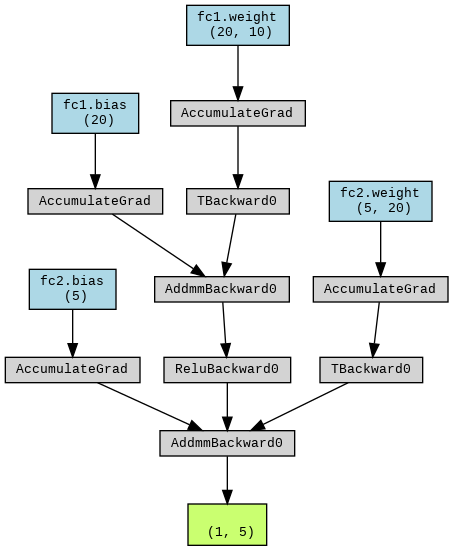

In [9]:
# 모델에 입력 데이터 전달
x = torch.randn(1, 10)
y = model(x)

# 모델 구조 시각화
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('model_structure', cleanup=True)
from IPython.display import Image
Image(filename='model_structure.png')

In [10]:
import matplotlib.pyplot as plt

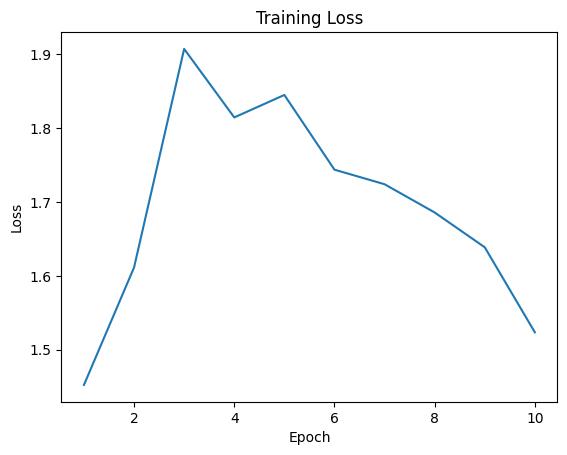

In [11]:
# 학습 루프
epochs = 10
loss_values = []

for epoch in range(epochs):
    # 학습 코드
    outputs = model(x)
    loss = criterion(outputs, torch.randint(0, 5, (1,)))

    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()

    loss_values.append(loss.item())

# 학습 곡선 그래프 그리기
plt.plot(range(1, epochs+1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()